In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import os
PATH="../source_codes/dataset/"
print(os.listdir(PATH))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv']


In [3]:
from IPython.display import Image

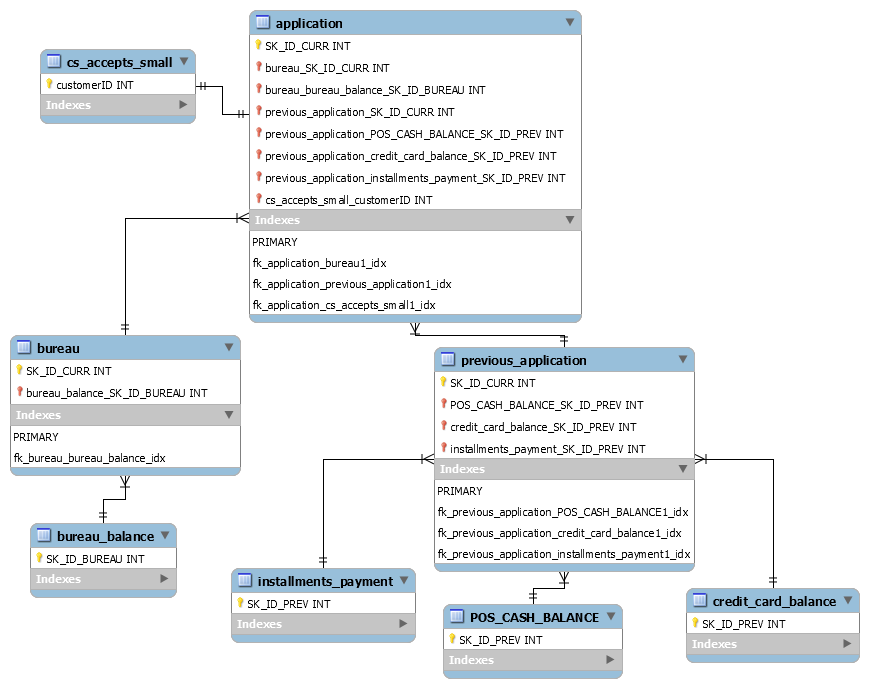

In [6]:
Image('BD.png')

- application_train/application_test: Основные данные, заемщик идентифицируется по полю SK_ID_CURR
- bureau: Данные по предыдущим займам в других кредитных организациях из кредитного бюро
- bureau_balance: Ежемесячные данные по предыдущим кредитам по бюро. Каждая строка - месяц испльзования кредита
- previous_application: Предыдущие заявки по кредитам в организации, каждая имеет уникальное поле SK_ID_PREV
- POS_CASH_BALANCE: Ежемесячные данные по кредитам в организации выдачей наличными и кредитам на покупки товаров
- credit_card_balance: Ежемесячные данные по балансу кредитных карт в организации
- installments_payment: Платежная история предыдущих займов в организации

Загрузим основные данные.

In [3]:
app_train = pd.read_csv(PATH + 'application_train.csv',)
app_test = pd.read_csv(PATH + 'application_test.csv',)
print ("формат обучающей выборки:", app_train.shape)
print ("формат тестовой выборки:", app_test.shape) 

формат обучающей выборки: (307511, 122)
формат тестовой выборки: (48744, 121)


Итого у нас есть 307 тысяч записей и 122 признака в обучающей выборке и 49 тысяч записей и 121 признак в тестовой. Расхождение,  целевого признака TARGET в тестовой выборке (его предсказываем)

In [4]:
pd.set_option('display.max_columns', None) # иначе pandas не покажет все столбцы
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
app_train.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

Данные очень подробные, вплоть до материала, из которого сделаны стены жилища заемщика. Как видно из info, часть данных неполная и часть - категориальная, они отображаются как object. Большинство моделей с такими данными не работают, нам придется что-то с этим делать. Перейдем к EDA

## Exploratory Data Analysis или первичное исследование данных

В процессе EDA мы считаем основные статистики и рисуем графики, чтобы найти тренды, аномалии, паттерны и связи внутри данных. Цель EDA - узнать, что могут рассказать данные. Обычно анализ идет сверху вниз - от общего обзора к исследованию отдельных зон, которые привлекают внимание и могут представлять интерес. 

### Распределение целевой переменной

In [6]:
app_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

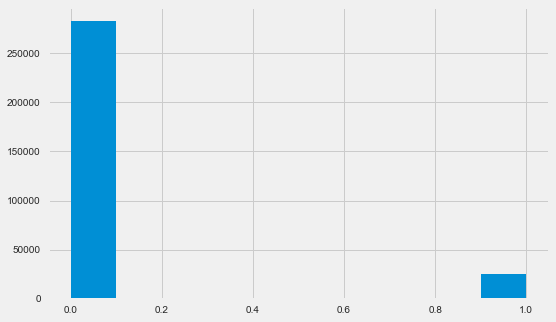

In [7]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [8,5]

plt.hist(app_train.TARGET)
plt.show()

1 означает проблемы любого рода с возвратом, 0 - отсутствие проблем

### Исследование недостающих данных

In [8]:
# Функция для подсчета недостающих столбцов
def missing_values_table(df):
    
        # Всего недостает
        mis_val = df.isnull().sum()
        
        # Процент недостающих данных
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Таблица с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименование столбцов
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Сортировка про процентажу
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Инфо
        print ("В выбранном датафрейме " + str(df.shape[1]) + " столбцов.\n"      
            "Всего " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов с неполными данными.")
        
        # Возврат таблицы с данными
        return mis_val_table_ren_columns
    
missing_values = missing_values_table(app_train)
missing_values.head(10)

В выбранном датафрейме 122 столбцов.
Всего 67 столбцов с неполными данными.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4

В графическом формате:

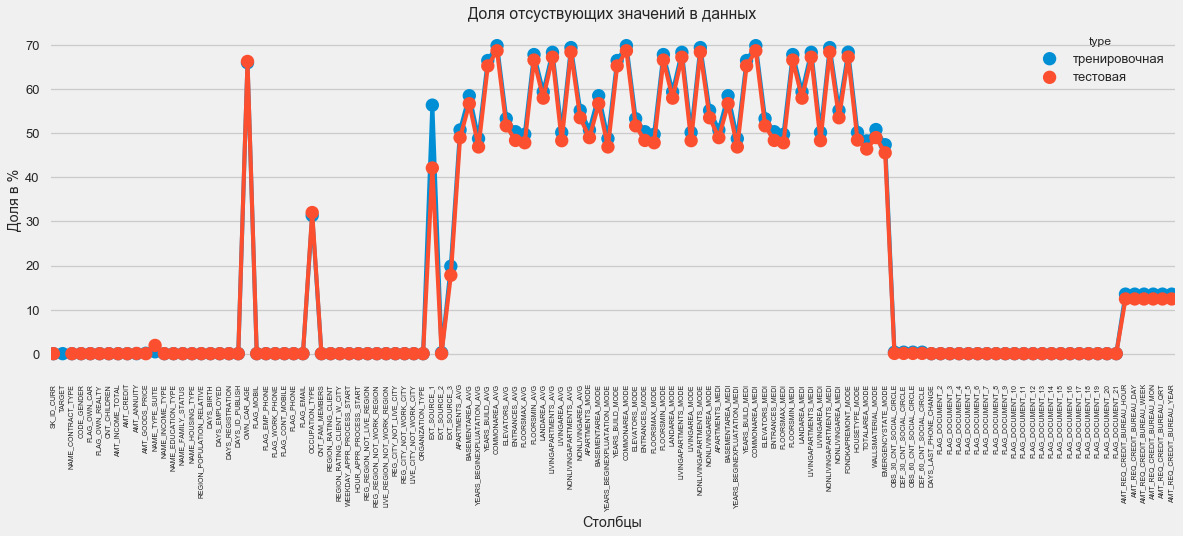

In [9]:
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(18,6))
miss_train = pd.DataFrame((app_train.isnull().sum())*100/app_train.shape[0]).reset_index()
miss_test = pd.DataFrame((app_test.isnull().sum())*100/app_test.shape[0]).reset_index()
miss_train["type"] = "тренировочная"
miss_test["type"]  =  "тестовая"
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot("index",0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Доля отсуствующих значений в данных")
plt.ylabel("Доля в %")
plt.xlabel("Столбцы")

Нужна аугментация данных (класс WoE)

### Типы столбцов и кодирование категориальных данных

In [10]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
app_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Кодируем One-Hot-encoding - один стоблец раскладывается на несколько по количеству вариантов и в этих столбцах отмечается, какой вариант у данной записи.

In [12]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


Так как количество вариантов в столбцах выборок не равное, количество столбцов теперь не совпадает. Требуется выравнивание - нужно убрать из тренировочной выборки столбцы, которых нет в тестовой. Это делает метод align, нужно указать axis=1 (для столбцов).

In [13]:
#сохраним лейблы, их же нет в тестовой выборке и при выравнивании они потеряются. 
train_labels = app_train['TARGET']
# Выравнивание - сохранятся только столбцы. имеющиеся в обоих датафреймах
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
print('Формат тренировочной выборки: ', app_train.shape)
print('Формат тестовой выборки: ', app_test.shape)
# Add target back in to the data
app_train['TARGET'] = train_labels

Формат тренировочной выборки:  (307511, 242)
Формат тестовой выборки:  (48744, 242)


### Корреляция в данных

Хороший метод понять даные - рассчитать коэффициенты коррелации Пирсона для данных относительно целевого признака. 

In [14]:
# Кореляция и сротировка
correlations = app_train.corr()['TARGET'].sort_values()

# Отображение
print('Наивысшая позитивная корреляция: \n', correlations.tail(15))
print('\nНаивысшая негативная коррелация: \n', correlations.head(15))

Наивысшая позитивная корреляция: 
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Наивы

Таким образом, внешние данные слабо коррелируют с таргетом (кроме самого таргета, который, понятно, равен сам себе). Однако из данных выделяются возраст и некие "внешние источники данных". Вероятно, это некие дополнительные данные из других кредитных организаций.

### Возраст

Понятно, что чем старше клиент, тем выше вероятность возврата (до определенного предела, конечно). Но возраст почему-то указан в отрицательных днях до выдачи кредита, поэтому он положительно коррелирует с невозвратом (что выглядит несколько странно). Приведем его к положительному значению и посмотрим на корреляцию.

In [15]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.078239308309827088

Посмотрим на переменнную внимательнее. Начнем с гистограммы.

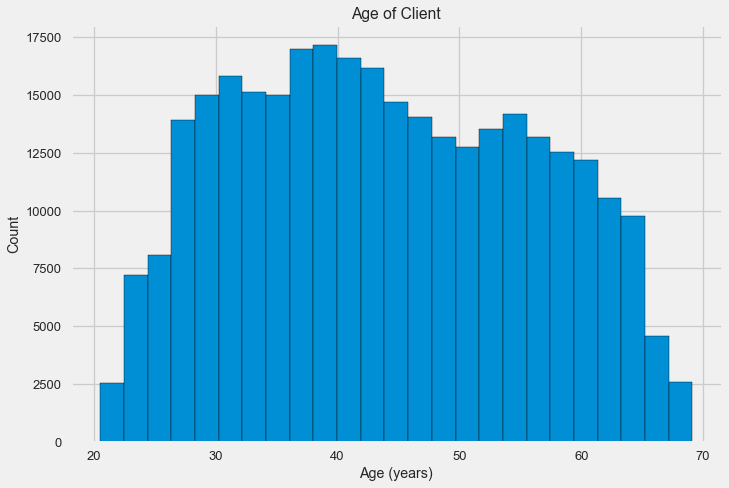

In [16]:
# Гистограмма распределения возраста в годах, всего 25 столбцов
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Сама по себе гистограмма распределения может сказать немного полезного, кроме того что мы не видим особых выбросов и все выглядит более-менее правдоподобно. Чтобы показать эффект влияния возраста на резльтат, можно построить график kernel density estimation (KDE) 

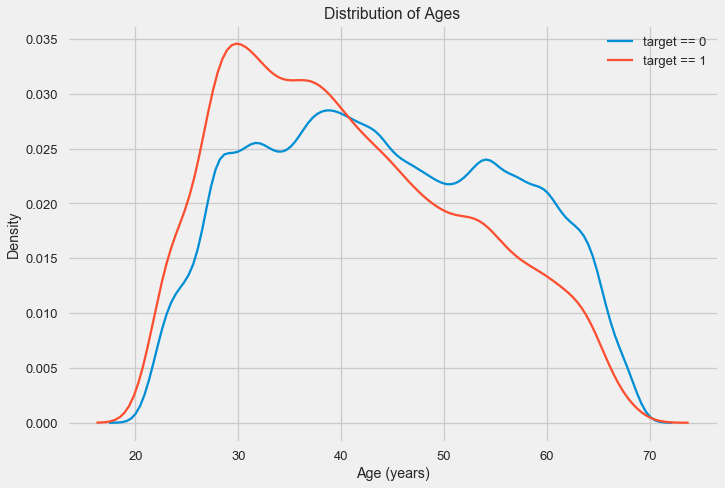

In [17]:
# KDE займов, выплаченных вовремя
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE проблемных займов
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Обозначения
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Как видно, доля невозвратов выше для молодых людей и снижается с ростом возраста. Это не повод отказывать молодым людям в кредите полностью, такая "рекомендация" приведет лишь к потере доходов и рынка для банка. 

### Внешние источники

Посмотрим внимательнее на "внешние источники данных" и их корреляцию.

In [18]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

Также коррелацию удобно отображать при помощи heatmap

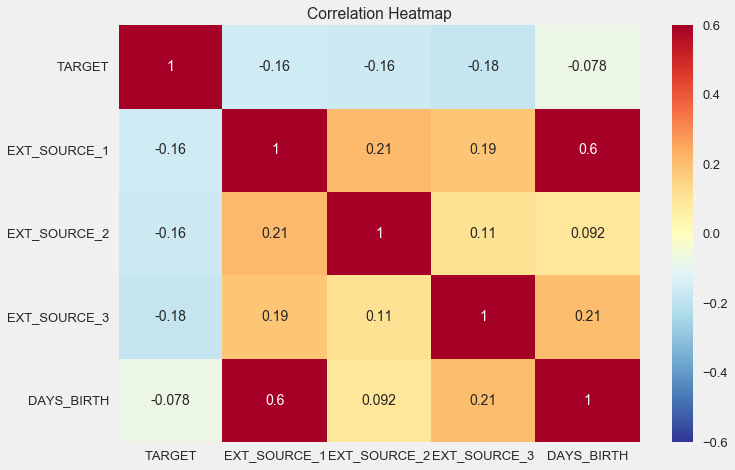

In [19]:
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Как видно, все источники показывают негативную корреляцию с таргетом. Посмотрим на рапсределение KDE по каждому источнику.

D:\python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


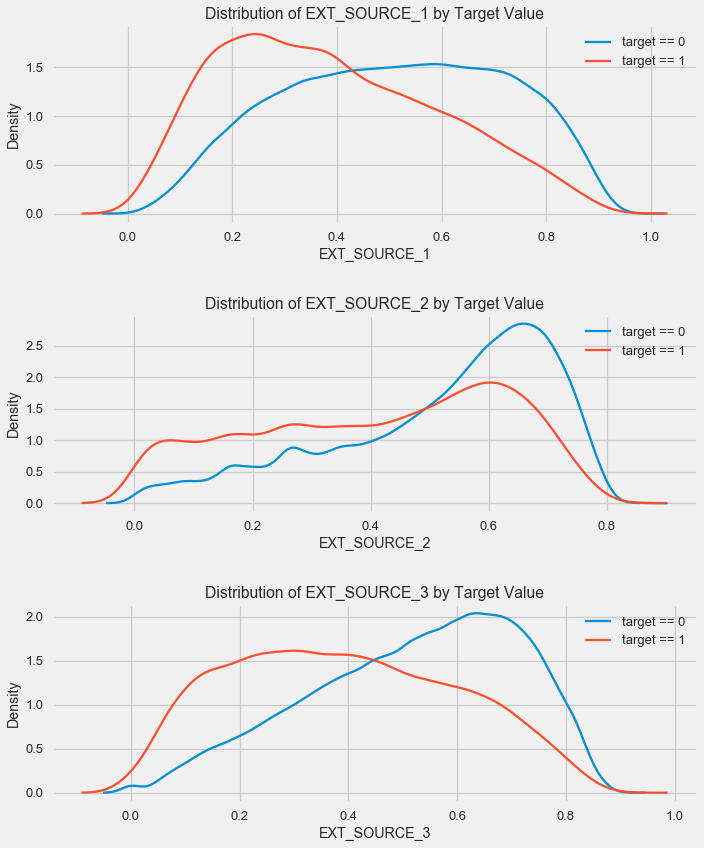

In [20]:
plt.figure(figsize = (10, 12))

# итерация по источникам
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # сабплот
    plt.subplot(3, 1, i + 1)
    # отрисовка качественных займов
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # отрисовка дефолтных займов
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # метки
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

Картина аналогична рапределению по возрасту - с ростом показателя растет вероятность возврата кредита. Третий источник наиболее силен в этом плане. Источники внешних данных и возраст будут иметь наивысшее значение в построении модели.

### Парный график

Для лучшего понимания взаимоотношений этих переменных можно построить парный график, в нем мы сможем увидеть взаимоотношения каждой пары и гистограмму распределения по диагонали. Выше диагонали можно показать диаграмму рассеяния, а ниже - 2d KDE.

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


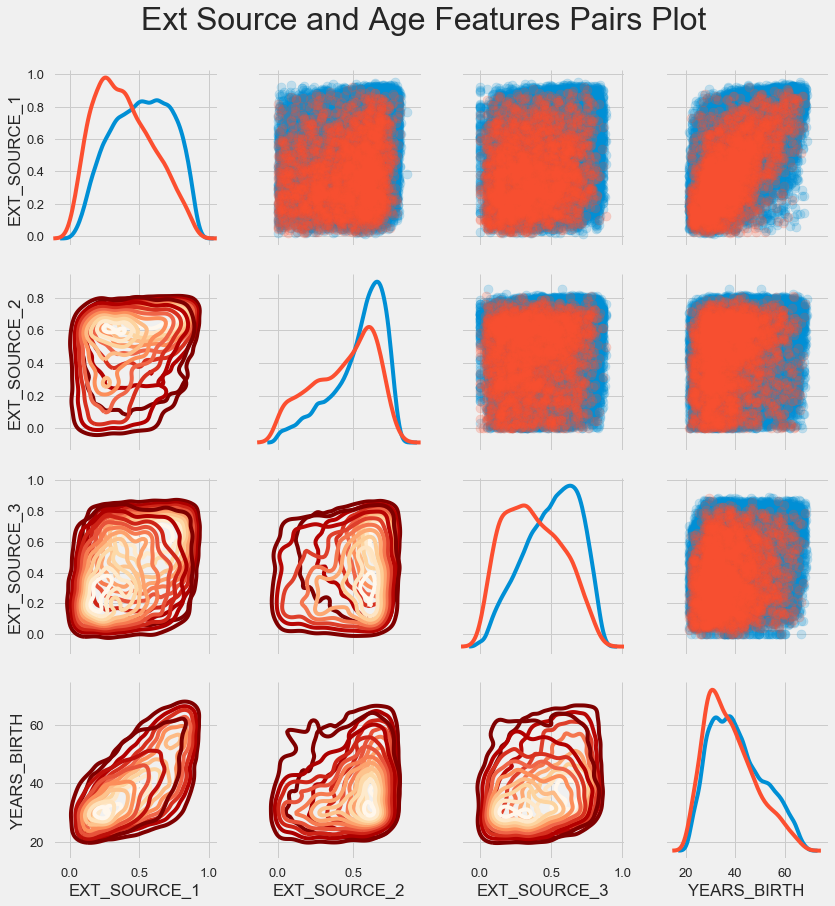

In [89]:
#вынесем данные по возрасту в отдельный датафрейм
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# копирование данных для графика
plot_data = ext_data.drop(labels = ['DAYS_BIRTH'], axis=1).copy()

# Добавим возраст
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Уберем все незаполненнные строки и ограничим таблицу в 100 тыс. строк
plot_data = plot_data.dropna().loc[:100000, :]

# Функиця для расчет корреляции
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Создание объекта pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Сверху - скаттерплот
grid.map_upper(plt.scatter, alpha = 0.2)

# Диагональ - гистограмма
grid.map_diag(sns.kdeplot)

# Внизу - распределение плотности
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);


### Исследование прочих признаков

In [60]:
application_train = pd.read_csv(PATH+"application_train.csv")
application_test = pd.read_csv(PATH+"application_test.csv")

In [84]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Количество займов': temp.values})

    # Расчет доли target=1 в категории
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Количество займов",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Доля проблемных', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

Итак, рассмотрим основные признаки колиентов

### Тип займа

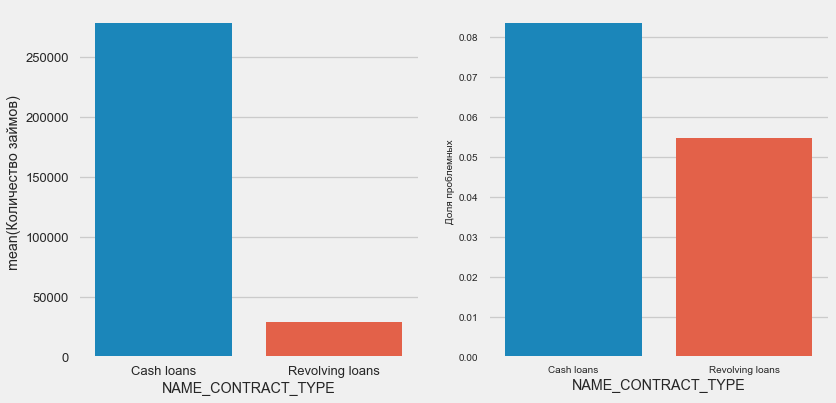

In [103]:
plot_stats('NAME_CONTRACT_TYPE')

Интересно, что револьверные кредиты (вероятно, овердрафты или что-то вроде того) составляют меньше 10% от общего количества займов. В то же время процент невозврата среди них гораздо выше. Хороший повод пересмотреть методику работы с этими займами, а может быть и отказаться от них вовсе.

### Пол клиента

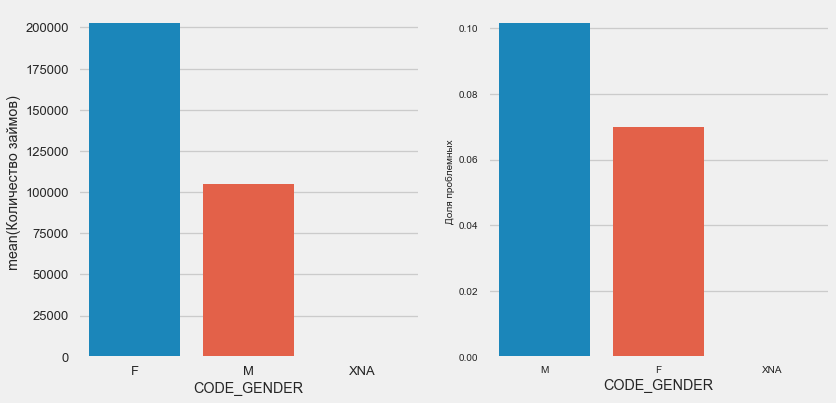

In [87]:
plot_stats('CODE_GENDER')

Женщин-клиентов почти вдвое больше мужчин, при этом мужчины показывают гораздо более высокий риск.

### Владение машиной и недвижимостью

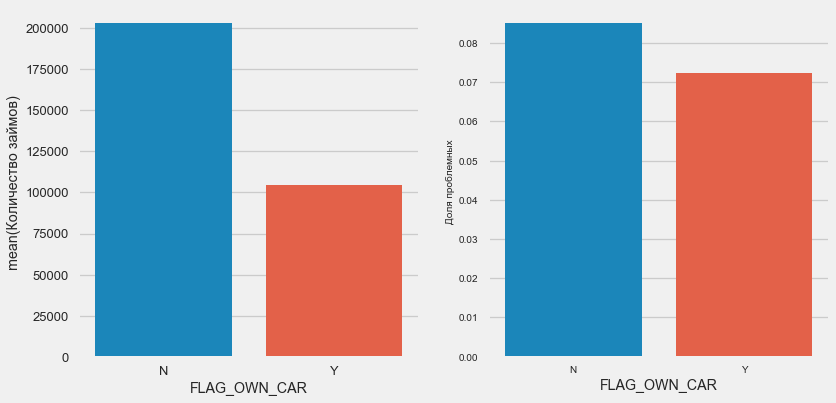

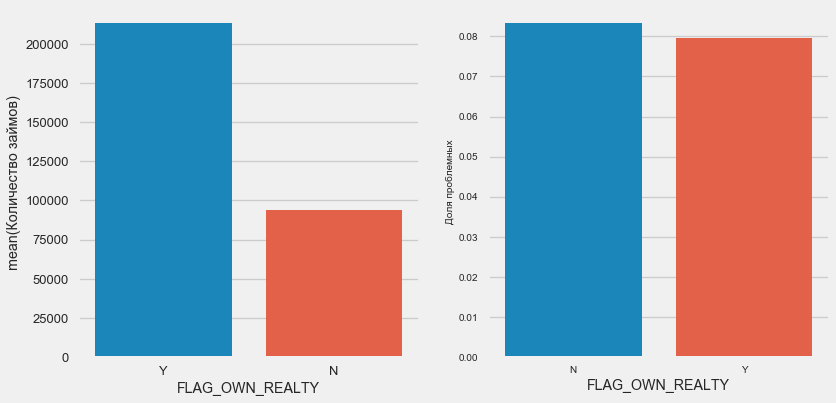

In [88]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

Клиентов с машиной вдвое меньше без. Риск по ним практически одинаковый, клиенты с машиной платят чуть лучше.

По недвижимости обратная картина - клиентов без нее вдвое меньше. Риск по владельцам недвижимости также чуть меньше.

### Семейный статус

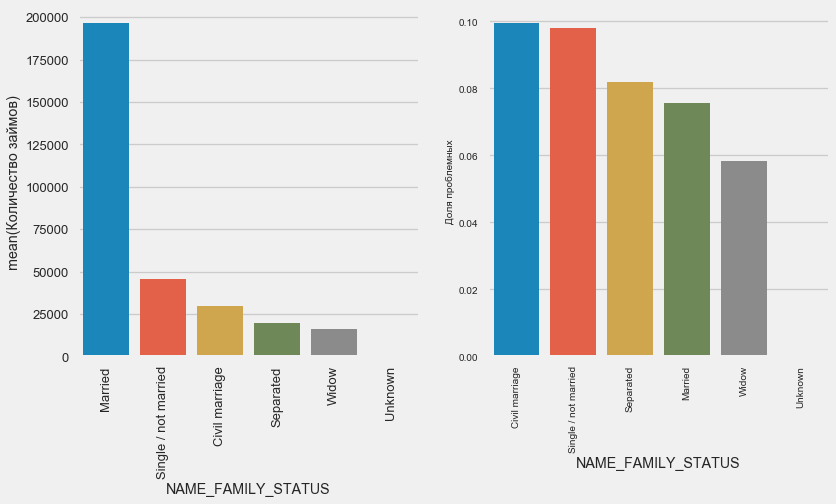

In [89]:
plot_stats('NAME_FAMILY_STATUS',True, True)

В то время как большинство клиентов состоит в браке, ниаболее рискованы клиенты в гражданском браке и одинокие. Вдовцы показывают минимальный риск.

### Количество детей

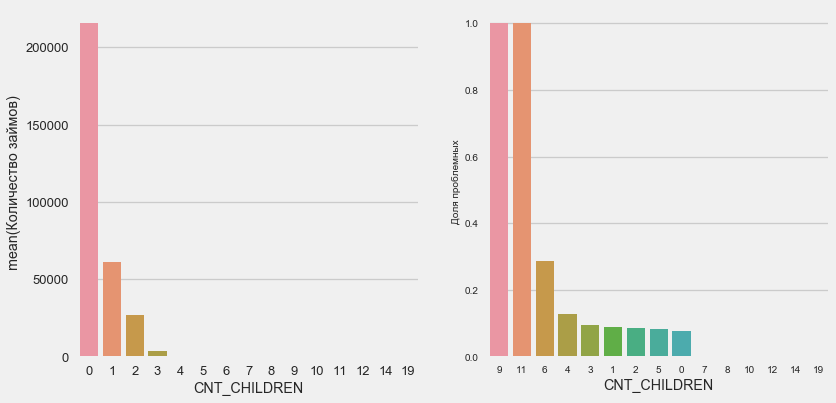

In [90]:
plot_stats('CNT_CHILDREN')

Большинство клиентов бездетны. При этом клиенты с 9 и 11 детьми показывют полный невозврат

In [93]:
application_train.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

Как показывает подстчет значений, эти данные статистически незначимы - всео по 2 клиента обеих категорий. Однако, все 4 вышли в дефолт, равно как и половина клиентов с 6 детьми.

### Количество членов семьи

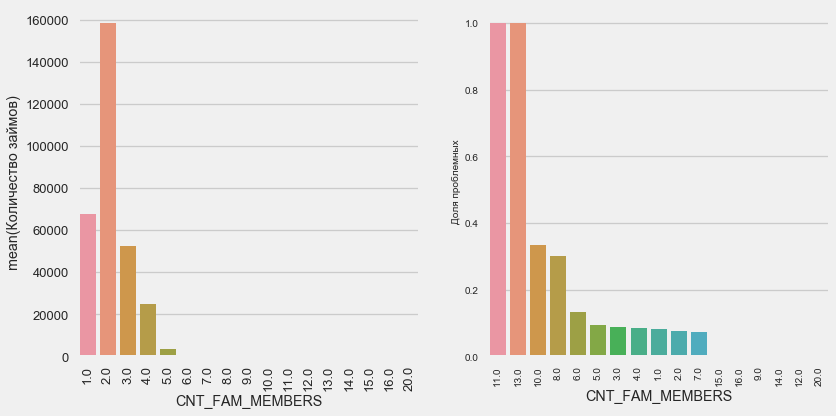

In [94]:
plot_stats('CNT_FAM_MEMBERS',True)

Чем меньше членов семьи, тем выше возвратность.

### Тип дохода

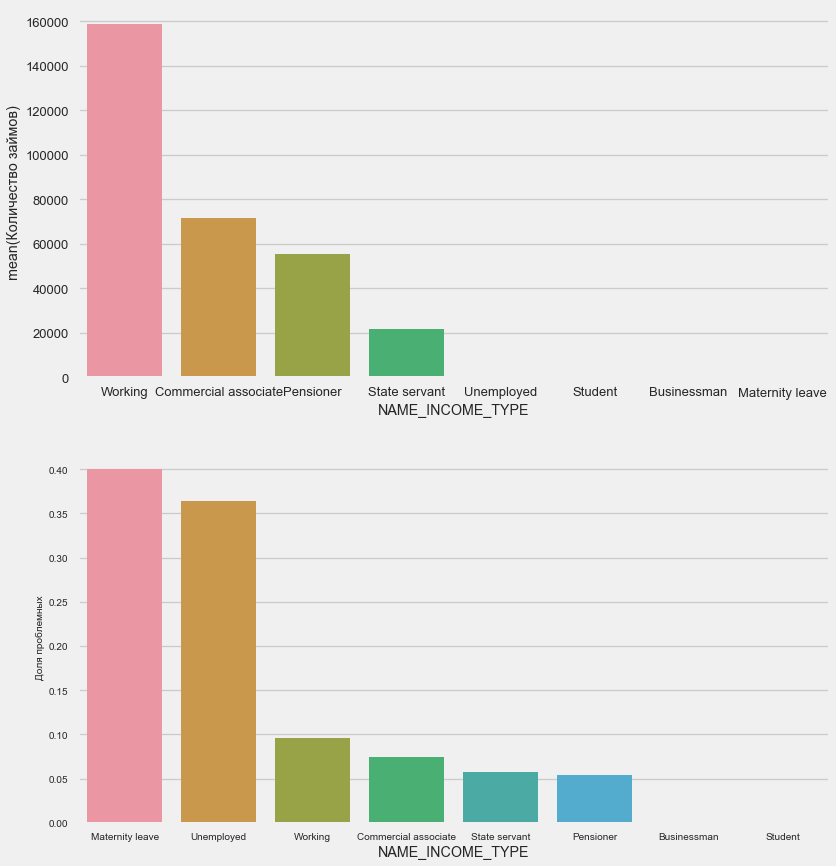

In [96]:
plot_stats('NAME_INCOME_TYPE',False,False)

Матери-одиночки и безраьботные, скорее всего, отсекаются на этапе подачи заявки. Но стабильно показывают проблемы.

### Вид деятельности

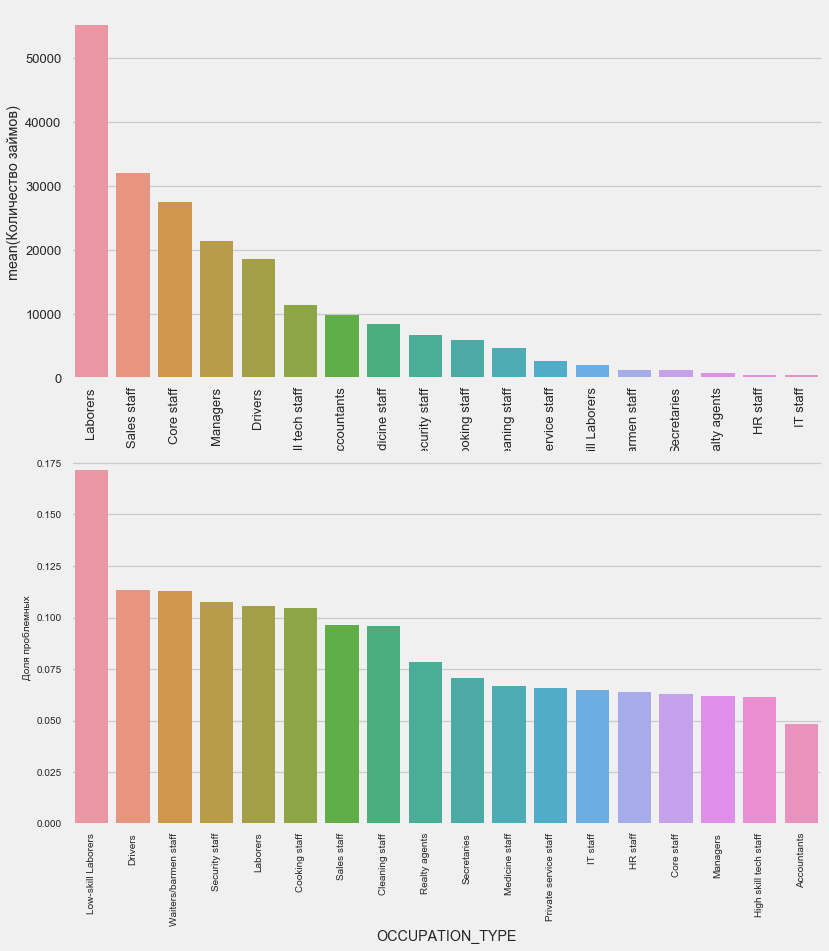

In [98]:
plot_stats('OCCUPATION_TYPE',True, False)

In [99]:
application_train.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Здесь вызывают интерес водители и сотрудники безопасности, которые довольно многочисленны и выходят на проблемы чаще других категорий.

### Образование

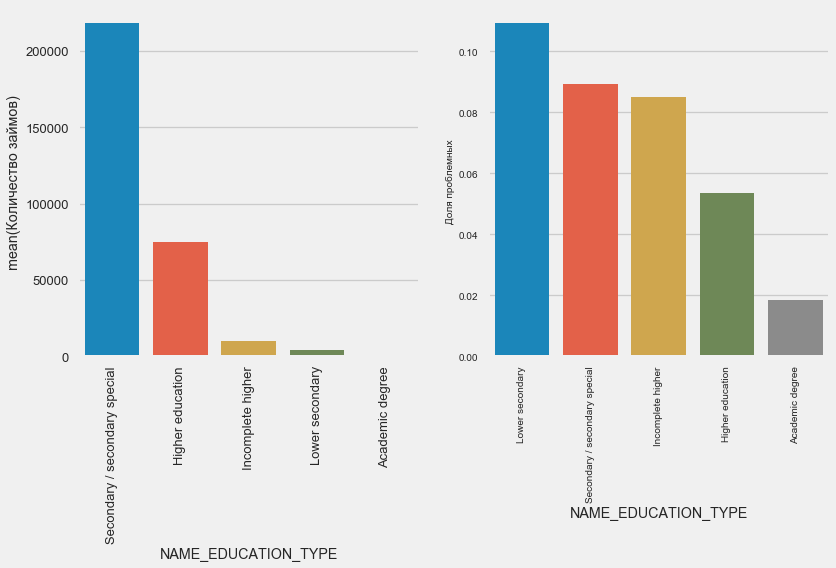

In [100]:
plot_stats('NAME_EDUCATION_TYPE',True)

Чем выше образование, тем лучше возвратность, очевидно.

### Тип организации - работодателя

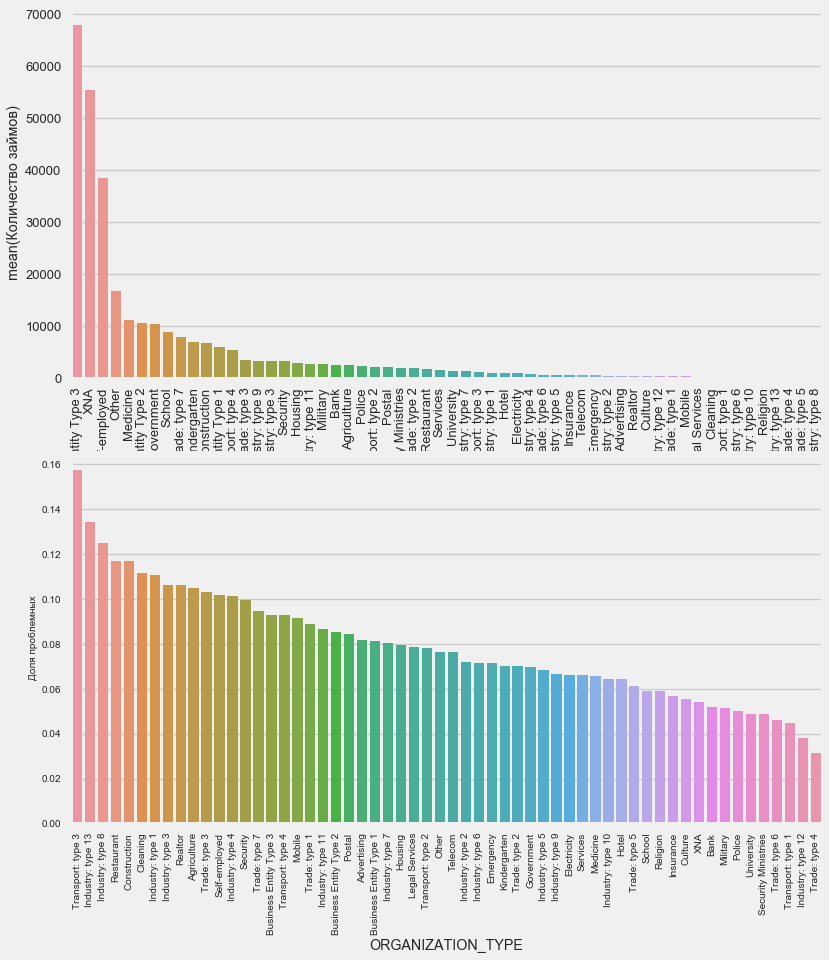

In [101]:
plot_stats('ORGANIZATION_TYPE',True, False)

Наивысший процент невозврата наблюдается в Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) и в  Restaurant (до 12%).

### Распределение суммы кредитования

Рассмотрим распределение сумм кредитов и влияние их на возвратность

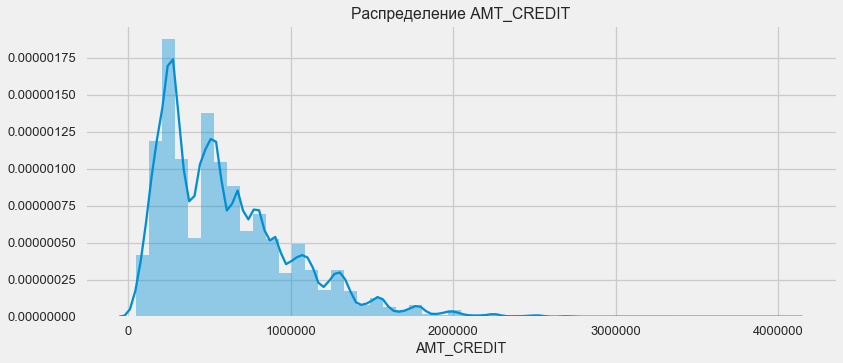

In [111]:
plt.figure(figsize=(12,5))
plt.title("Распределение AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])

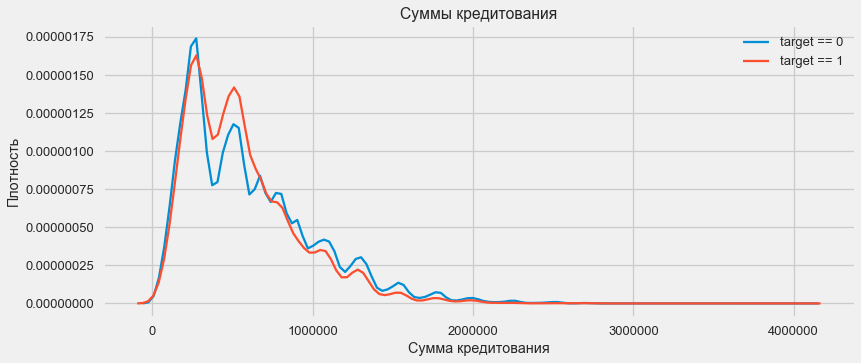

In [113]:
plt.figure(figsize=(12,5))

# KDE займов, выплаченных вовремя
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0')

# KDE проблемных займов
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')

# Обозначения
plt.xlabel('Сумма кредитования'); plt.ylabel('Плотность'); plt.title('Суммы кредитования');

Как показывает график плотности, крупные суммы возвращаются чаще

### Распределение по плотности проживания

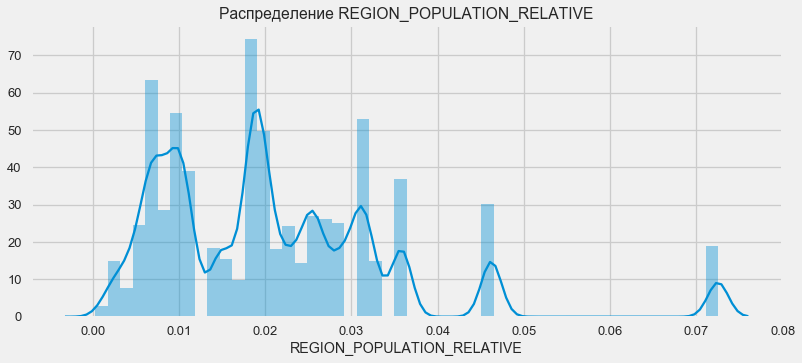

In [116]:
plt.figure(figsize=(12,5))
plt.title("Распределение REGION_POPULATION_RELATIVE")
ax = sns.distplot(app_train["REGION_POPULATION_RELATIVE"])

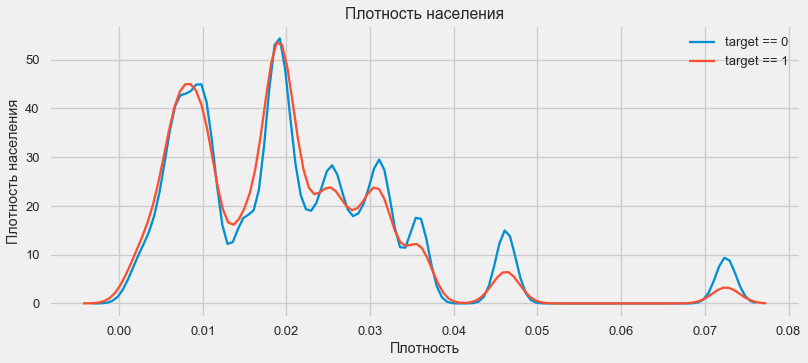

In [117]:
plt.figure(figsize=(12,5))

# KDE займов, выплаченных вовремя
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'REGION_POPULATION_RELATIVE'], label = 'target == 0')

# KDE проблемных займов
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'REGION_POPULATION_RELATIVE'], label = 'target == 1')

# Обозначения
plt.xlabel('Плотность'); plt.ylabel('Плотность населения'); plt.title('Плотность населения');

Клиенты из более населенных регионов склонны лучше выплачивать кредит.

### Распределение по опыту работы на текущем рабочем месте

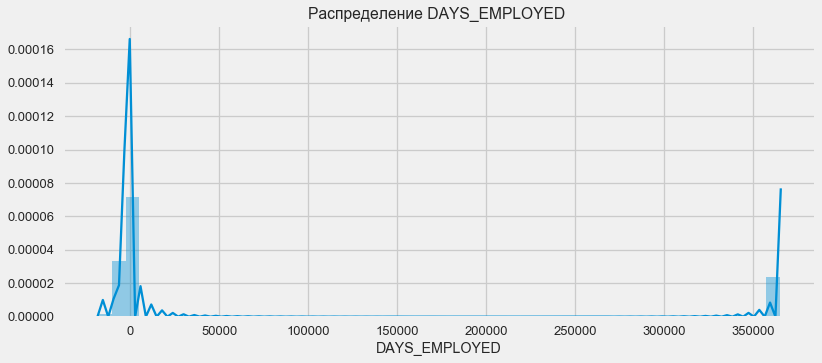

In [119]:
plt.figure(figsize=(12,5))
plt.title("Распределение DAYS_EMPLOYED ")
ax = sns.distplot(app_train["DAYS_EMPLOYED"])

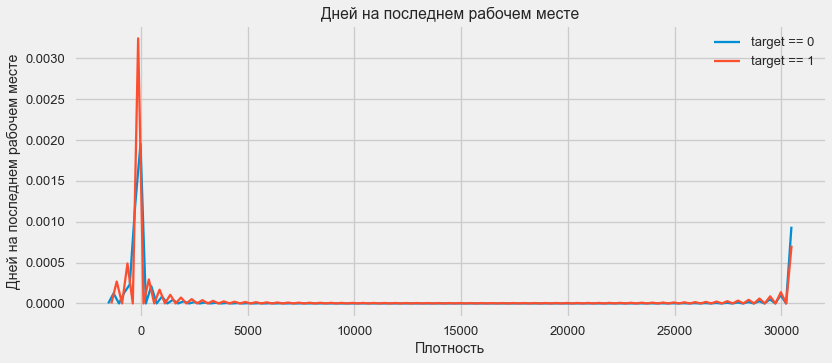

In [121]:
plt.figure(figsize=(12,5))

# KDE займов, выплаченных вовремя
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 12, label = 'target == 0')

# KDE проблемных займов
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 12, label = 'target == 1')

# Обозначения
plt.xlabel('Плотность'); plt.ylabel('Дней на последнем рабочем месте'); plt.title('Дней на последнем рабочем месте');

Тут однозначная зависимость не прослеживается.

## Feature Engineering - преобразование признаков

### Полиномиальные признаки

Полиномиальный метод конструирования признаков заключается в то, что мы просто создаем признаки, которые являются степенью имеющихся признаков и их произведениями. В некоторых случаях такие сконструированные признаки могут иметь более сильную кореляцию с целевой переменной, чем их "родители". Используем самые мощные по силе воздействия на результат 4 признака и степень 3, чтобы не слишком сильно усложнять модель и избежать оверфиттинга.

In [24]:
# создадим новый датафрейм для полиномиальных признаков
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# обработаем отуствующие данные
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop('TARGET', axis=1)

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Создадим полиномиальный объект степени 3
poly_transformer = PolynomialFeatures(degree = 3)

In [25]:
# Тренировка полиномиальных признаков
poly_transformer.fit(poly_features)

# Трансформация признаков
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Формат полиномиальных признаков: ', poly_features.shape)

Формат полиномиальных признаков:  (307511, 35)


In [26]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

Итого 35 полиномиальных и производных признаков. Проверих их корреляцию с таргетом.

In [28]:
# Датафрейм для новых фич 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Добавим таргет
poly_features['TARGET'] = poly_target

# рассчитаем корреляцию
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Отобразим признаки с наивысшей корреляцией
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Итак, некоторые признаки показывают более высокую корреляцию, чем исходные. Есть смысл попробовать обучение с ними и без них (как и многое другое в машинном обучении, это можно выяснить экспериментально). Для этого создадим копию датафреймов и добавим туда новые фичи.

In [29]:
# загрузим тестовые признаки в датафрейм
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# объединим тренировочные датафреймы
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# объединим тестовые датафреймы
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Выровняем датафреймы
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Посмотрим формат
print('Тренировочная выборка с полиномиальными признаками: ', app_train_poly.shape)
print('Тестовая выборка с полиномиальными признаками: ', app_test_poly.shape)

Тренировочная выборка с полиномиальными признаками:  (307511, 277)
Тестовая выборка с полиномиальными признаками:  (48744, 277)


## Тренировка модели

### Базовый результат

Ниже 0,5 упасть нельзя. В нашем случае предварительная работа уже проведена и можно использовать более сложные модели.

### Логистическая регрессия

In [34]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Уберем таргет из тренировочных данных
if 'TARGET' in app_train:
    train = app_train.drop(labels = ['TARGET'], axis=1)
else:
    train = app_train.copy()
features = list(train.columns)

# копируем тестовые данные
test = app_test.copy()

# заполним недостающее по медиане
imputer = Imputer(strategy = 'median')

# Нормализация
scaler = MinMaxScaler(feature_range = (0, 1))

# заполнение тренировочной выборки
imputer.fit(train)

# Трансофрмация тренировочной и тестовой выборок
train = imputer.transform(train)
test = imputer.transform(app_test)

# то же самое с нормализацией
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Формат тренировочной выборки: ', train.shape)
print('Формат тестовой выборки: ', test.shape)

Формат тренировочной выборки:  (307511, 242)
Формат тестовой выборки:  (48744, 242)


Используем логистическую регрессию из Scikit-Learn как первую модель. Возьмем дефольную модель с одной поправкой - понизим параметр регуляризации C во избежание оверфиттинга. Синтаксис обычный - создаем модель, тренируем ее и пресказываем вероятность при помощи predict_proba (нам же нужна вероятность, а не 0/1)

In [35]:
from sklearn.linear_model import LogisticRegression

# Создаем модель
log_reg = LogisticRegression(C = 0.0001)

# Тренируем модель
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Теперь модель можно использовать для предсказаний. Метод prdict_proba даст на выходе массив m x 2, где m - количество наблюдений, первый столбец - вероятность 0, второй - вероятность 1. Нам нужен второй (вероятность невозврата).

In [36]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

Теперь можно создать файл для выгрузки данных модели. Создадим датафрейм из ID клиентов и вероятности невозврата и выгрузим его.

In [41]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


SK_ID_CURR    TARGET
0      100001  0.087954
1      100005  0.163151
2      100013  0.109923
3      100028  0.077124
4      100038  0.151694

In [42]:
submit.to_csv('log_reg_baseline.csv', index = False)

#### Итак, результат: 0.673

### Улучшенная модель - случайный лес

Логрег показывает себя не очень хорошо, попробуем использовать улчшенную модель - случайный лес. Используем 100 деревьев. Схема работы с моделью все та же, совершенно стандартная.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Создадим классификатор
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50)

# Тренировка на тернировочных данных
random_forest.fit(train, train_labels)

# Предсказание на тестовых данных
predictions = random_forest.predict_proba(test)[:, 1]

# Создание датафрейма для загрузки
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Сохранение
submit.to_csv('random_forest_baseline.csv', index = False)

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### результат случайного леса чуть лучше - 0,633

### Тренировка модели с полиномиальными признаками

Теперь, когда мы имеем модель. которая делает хоть что-то - самое время потестить наши полиномиальные признаки. Сделаем с ними все то же самое и сравним результат.

In [44]:
poly_features_names = list(app_train_poly.columns)

# Создание и тренировка объекта для заполнение недостающих данных
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Нормализация
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50)

In [45]:
# Тренировка на полиномиальных данных
random_forest_poly.fit(poly_features, train_labels)

# Предсказания
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

# Датафрейм для загрузки
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Сохранение датафрейма
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### результат случайного леса с полиномиальными признаками  - 0,683

### Градиентный бустинг

Построим простую модель и проверим её производительность. Самая популярная модель кернелов

In [46]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(train, train_labels)

predictions = clf.predict_proba(test)[:, 1]

# Датафрейм для загрузки
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Сохранение датафрейма
submit.to_csv('lightgbm_baseline.csv', index = False)

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


#### Результат LightGBM - 0,770

### Интерпретация модели - Важность признаков

Самый простой метод интерпредации модели - посмотреть на важность признаков. Так как наш классификатор обрабатывал массив, потребуется провести некоторую работу, чтобы заново поставить названия столбцов в соотвествии с колонками этого массива.

In [56]:
# Функция для расчета важности признаков
def show_feature_importances(model, features):
    plt.figure(figsize = (12, 8))
    
    # Создадаим датафрейм фич и их важностей и отсортируем его 
    results = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results = results.sort_values('importance', ascending = False)
    
    # Отображение
    print(results.head(10))
    print('\n Признаков с важностью выше 0.01 = ', np.sum(results['importance'] > 0.01))
    
    # График
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances');
    return results

              feature  importance
28       EXT_SOURCE_1         310
30       EXT_SOURCE_3         282
29       EXT_SOURCE_2         271
7          DAYS_BIRTH         192
3          AMT_CREDIT         161
4         AMT_ANNUITY         142
5     AMT_GOODS_PRICE         129
8       DAYS_EMPLOYED         127
10    DAYS_ID_PUBLISH         102
9   DAYS_REGISTRATION          69

 Признаков с важностью выше 0.01 =  158


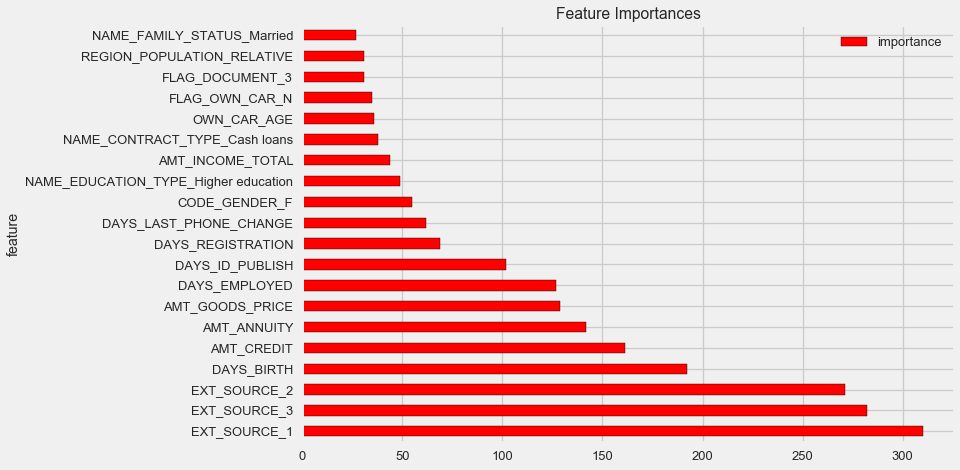

In [57]:
# И рассчитаем все это по модели градиентного бустинга
feature_importances = show_feature_importances(clf, features)


Как и следовало ожидать, наиболее важны для модели все те же 4 признака. 

## Добавление данных из прочих таблиц

Теперь рассмотрим внимательно дополнительные таблицы и что с ними можно сделать. Сразу начнем готовить таблицы для дальшейего обучения. Но для начала удалим из памяти прошлые объемные таблицы, очистим память при помощи сборщика мусора и импортируем необходимые для дальнейшего анализа библиотеки. Иначе нам не хватит наших 64Гб

In [4]:
import gc

#del app_train, app_test, train_labels, application_train, application_test, poly_features, poly_features_test 

gc.collect()

0

In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

from lightgbm import LGBMClassifier

Импортируем данные, сразу уберем целевой столбец в отдельную колонку

In [7]:
data = pd.read_csv('../input/application_train.csv')
test = pd.read_csv('../input/application_test.csv')
prev = pd.read_csv('../input/previous_application.csv')
buro = pd.read_csv('../input/bureau.csv')
buro_balance = pd.read_csv('../input/bureau_balance.csv')
credit_card  = pd.read_csv('../input/credit_card_balance.csv')
POS_CASH  = pd.read_csv('../input/POS_CASH_balance.csv')
payments = pd.read_csv('../input/installments_payments.csv')

#Separate target variable
y = data['TARGET']
del data['TARGET']

Сразу же закодируем категориальные признаки. 

In [8]:
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

one_hot_df = pd.concat([data,test])
one_hot_df = pd.get_dummies(one_hot_df, columns=categorical_features)

data = one_hot_df.iloc[:data.shape[0],:]
test = one_hot_df.iloc[data.shape[0]:,]

print ('Формат тренировочной выборки', data.shape)
print ('Формат тестовой выборки', test.shape)

Формат тренировочной выборки (307511, 245)
Формат тестовой выборки (48744, 245)


#### Данные кредитного бюро по ежемесячному балансу кредитов.

In [9]:
buro_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

MONTHS_BALANCE - количество месяцев до даты подачи заявки на кредит. Взглянем подробнее на "статусы"

In [11]:
buro_balance.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

Статусы означают следующее: 

С - closed, то есть погашенный кредит. 
X - неизвестный статус. 
0 - текущий кредит, отсуствие просрочек. 
1 - просрочка 1-30 дней, 2 - просрочка 31-60 дней и так далее до статуса 5 - кредит продан третьей стороне или списан.

Отсюда можно выделить например следующие признаки:
buro_grouped_size - количество записей в базе
buro_grouped_max - максимальный баланс по кредиту
buro_grouped_min - минимальный баланс по кредиту

А также все эти статусы по кредиту можно просто закодировать (используем метод unstack, а затем присоединить полученные данные к таблице buro, благо что SK_ID_BUREAU там и там совпадает.

In [16]:
buro_grouped_size = buro_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].size()
buro_grouped_max = buro_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max()
buro_grouped_min = buro_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].min()

buro_counts = buro_balance.groupby('SK_ID_BUREAU')['STATUS'].value_counts(normalize = False)
buro_counts_unstacked = buro_counts.unstack('STATUS')
buro_counts_unstacked.columns = ['STATUS_0', 'STATUS_1','STATUS_2','STATUS_3','STATUS_4','STATUS_5','STATUS_C','STATUS_X',]
buro_counts_unstacked['MONTHS_COUNT'] = buro_grouped_size
buro_counts_unstacked['MONTHS_MIN'] = buro_grouped_min
buro_counts_unstacked['MONTHS_MAX'] = buro_grouped_max

buro = buro.join(buro_counts_unstacked, how='left', on='SK_ID_BUREAU')

Pre-processing buro_balance...


In [29]:
del buro_balance
gc.collect()

633

#### Общие данные по кредитным бюро

In [19]:
buro.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG     ...      STATUS_1  STATUS_2  \
0                     NaN                   0     ...           NaN       NaN   
1                     NaN                   0     ...           NaN       NaN   
2                     NaN                   0     ...           NaN       NaN   
3                     NaN                   0     ...           NaN       NaN   
4                 77674.5                   0     ...           NaN       NaN   

   STATUS_3  STATUS_4 STATUS_5  STATUS_C  STATUS_X  MONTHS_COUNT  MONTHS_MIN  \
0       NaN       NaN      NaN       NaN       NaN           NaN         NaN   
1       NaN       NaN      NaN       NaN       NaN           NaN         NaN   
2       NaN       NaN      NaN       NaN       NaN           NaN         NaN   
3       NaN       NaN      NaN       NaN       NaN           NaN         NaN   
4       NaN       NaN      NaN       NaN       NaN           NaN         NaN   

   MONTHS_MAX  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 28 columns]

Довольно много данных, которые, в общем-то, можно попробовать просто закодировать One-Hot-Encoding'ом, сгруппировать по SK_ID_CURR, усреднить и, таки образом, подготовить для объединения с основной таблицей

In [21]:
buro_cat_features = [bcol for bcol in buro.columns if buro[bcol].dtype == 'object']
buro = pd.get_dummies(buro, columns=buro_cat_features)
avg_buro = buro.groupby('SK_ID_CURR').mean()
avg_buro['buro_count'] = buro[['SK_ID_BUREAU', 'SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
del avg_buro['SK_ID_BUREAU']

Таблицу buro теперь можно удалить из памяти.

In [27]:
del buro
gc.collect()

5354

#### Данные по предыдущим заявкам

In [24]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

Точно также закодируем категориальные признаки, усредним и объединим по текущему ID.

In [25]:
prev_cat_features = [pcol for pcol in prev.columns if prev[pcol].dtype == 'object']
prev = pd.get_dummies(prev, columns=prev_cat_features)
avg_prev = prev.groupby('SK_ID_CURR').mean()
cnt_prev = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
avg_prev['nb_app'] = cnt_prev['SK_ID_PREV']
del avg_prev['SK_ID_PREV']

In [30]:
del prev
gc.collect()

47

#### Баланс по кредитной карте

In [31]:
POS_CASH.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [32]:
POS_CASH.NAME_CONTRACT_STATUS.value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

Закодируем категориальные признаки и подготовим таблицу для объединения

In [33]:
le = LabelEncoder()
POS_CASH['NAME_CONTRACT_STATUS'] = le.fit_transform(POS_CASH['NAME_CONTRACT_STATUS'].astype(str))
nunique_status = POS_CASH[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').nunique()
nunique_status2 = POS_CASH[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').max()
POS_CASH['NUNIQUE_STATUS'] = nunique_status['NAME_CONTRACT_STATUS']
POS_CASH['NUNIQUE_STATUS2'] = nunique_status2['NAME_CONTRACT_STATUS']
POS_CASH.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS'], axis=1, inplace=True)

#### Данные по картам

In [34]:
credit_card.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

Аналогичная работа

In [35]:
credit_card['NAME_CONTRACT_STATUS'] = le.fit_transform(credit_card['NAME_CONTRACT_STATUS'].astype(str))
nunique_status = credit_card[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').nunique()
nunique_status2 = credit_card[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').max()
credit_card['NUNIQUE_STATUS'] = nunique_status['NAME_CONTRACT_STATUS']
credit_card['NUNIQUE_STATUS2'] = nunique_status2['NAME_CONTRACT_STATUS']
credit_card.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS'], axis=1, inplace=True)

#### Данные по платежам

In [36]:
payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

Создадим три таблицы - со средними, минимальными и максимальными значениями из этой таблицы.

In [37]:
avg_payments = payments.groupby('SK_ID_CURR').mean()
avg_payments2 = payments.groupby('SK_ID_CURR').max()
avg_payments3 = payments.groupby('SK_ID_CURR').min()
del avg_payments['SK_ID_PREV']

In [38]:
del payments
gc.collect()

283

### Объединение таблиц

In [39]:
data = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(POS_CASH.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(POS_CASH.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(credit_card.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(credit_card.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_payments.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_payments.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_payments2.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_payments2.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_payments3.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_payments3.reset_index(), how='left', on='SK_ID_CURR')

In [40]:
del avg_prev, avg_buro, POS_CASH, credit_card, avg_payments, avg_payments2, avg_payments3
gc.collect()

372

In [42]:
print ('Формат тренировочной выборки', data.shape)
print ('Формат тестовой выборки', test.shape)
print ('Формат целевого столбца', y.shape)

Формат тренировочной выборки (307511, 504)
Формат тестовой выборки (48744, 504)
Формат целевого столбца (307511,)


И применим град бустинг по этой выросшей в два раза таблице

In [46]:
from lightgbm import LGBMClassifier

clf2 = LGBMClassifier()
clf2.fit(data, y)

predictions = clf2.predict_proba(test)[:, 1]

# Датафрейм для загрузки
submission = test[['SK_ID_CURR']]
submission['TARGET'] = predictions

# Сохранение датафрейма
submission.to_csv('lightgbm_full.csv', index = False)

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


##### результат - 0,785.

Не очень хорошо. Очень много памяти и низкая скорость.

ОК, попробуем более сложную методику с разделением на фолды, кросс-валидацией и выбором лучшей итерации.

In [54]:
folds = KFold(n_splits=5, shuffle=True, random_state=546789)
oof_preds = np.zeros(data.shape[0])
sub_preds = np.zeros(test.shape[0])

feature_importance_df = pd.DataFrame()

feats = [f for f in data.columns if f not in ['SK_ID_CURR']]

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(data)):
    trn_x, trn_y = data[feats].iloc[trn_idx], y.iloc[trn_idx]
    val_x, val_y = data[feats].iloc[val_idx], y.iloc[val_idx]
    
    clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.03,
        num_leaves=34,
        colsample_bytree=0.9,
        subsample=0.8,
        max_depth=8,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=375,
        silent=-1,
        verbose=-1,
        )
    
    clf.fit(trn_x, trn_y, 
            eval_set= [(trn_x, trn_y), (val_x, val_y)], 
            eval_metric='auc', verbose=100, early_stopping_rounds=100  #30
           )
    
    oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
    sub_preds += clf.predict_proba(test[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
    del clf, trn_x, trn_y, val_x, val_y
    gc.collect()

print('Full AUC score %.6f' % roc_auc_score(y, oof_preds)) 

test['TARGET'] = sub_preds

test[['SK_ID_CURR', 'TARGET']].to_csv('submission_cross.csv', index=False)

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.762854	valid_1's auc: 0.749899
[200]	training's auc: 0.787022	valid_1's auc: 0.770153
[300]	training's auc: 0.797827	valid_1's auc: 0.777758
[400]	training's auc: 0.805236	valid_1's auc: 0.78161
[500]	training's auc: 0.810798	valid_1's auc: 0.78385
[600]	training's auc: 0.815824	valid_1's auc: 0.785296
[700]	training's auc: 0.82028	valid_1's auc: 0.786203
[800]	training's auc: 0.824327	valid_1's auc: 0.786508
[900]	training's auc: 0.828191	valid_1's auc: 0.787001
[1000]	training's auc: 0.831614	valid_1's auc: 0.787432
[1100]	training's auc: 0.834908	valid_1's auc: 0.787518
[1200]	training's auc: 0.838274	valid_1's auc: 0.787575
[1300]	training's auc: 0.84157	valid_1's auc: 0.78735
Early stopping, best iteration is:
[1206]	training's auc: 0.838519	valid_1's auc: 0.787621
Fold  1 AUC : 0.787621
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.762929	valid_1's auc: 

#### Финальный скор 0,851

Очень хороший результат!!! Скорость около 5 сек на заявку. Укладываемся в нашу серверную память. Градиентный бустинг с внеш. таблициами и разделение на фолды, крос-валидация. Берем эту модель.

Определенно, дальше работать с признаками. Исследовать данные, какие-то из них признаков выделять, по-другому присоединять таблицы. Можно эксперименторовать с гиперпараметрами градиентного бустинга - напарвлений много. 
